In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# List of required columns
required_columns = ['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate']

# Load the CSV
df = pd.read_csv(
    'q_quora.csv',
    usecols=required_columns,
    dtype={'id': int, 'qid1': int, 'qid2': int, 'question1': str, 'question2': str, 'is_duplicate': str},
    on_bad_lines='skip',         # skips badly formatted lines (Pandas 1.3+)
    low_memory=False
)


In [5]:
df.shape

(404351, 6)

In [7]:
df['is_duplicate'].unique()

array(['0', '1',
       'Do bullets travel faster than the speed of sound when shot from a gun? If not, is it possible? If they do, what gun and how much devastation occurs?',
       'My sister told my crush that I like her without me asking her to do so. What should I do now?',
       ' how would this change the plot for the whole RR story?',
       'What were the greatest achievements of the Persian Empire?',
       'What are the best places to visit in Japan to get a feel for their latest technological advancements?',
       'My boyfriend wants to have sex with me . And I have mixed feelings regarding that. Should I do it or not ?',
       ' mass communication or pharmacy?',
       'What if we are actually moving back in time? Can one differentiate a backward flow of time from forward flow?',
       "I am in love with my classmate, I am gay and he's straight, what should I do?",
       'Does Donald Trump get to deduct his campaign expenses from his taxes?',
       ' 2) share bonanza

In [9]:
df = df[df['is_duplicate'].isin(['0', '1'])]

# Convert is_duplicate to int
df['is_duplicate'] = df['is_duplicate'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [13]:
new_df = df.sample(30000,random_state=2)

In [15]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0


is_duplicate
0    18880
1    11120
Name: count, dtype: int64
is_duplicate
0    62.933333
1    37.066667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

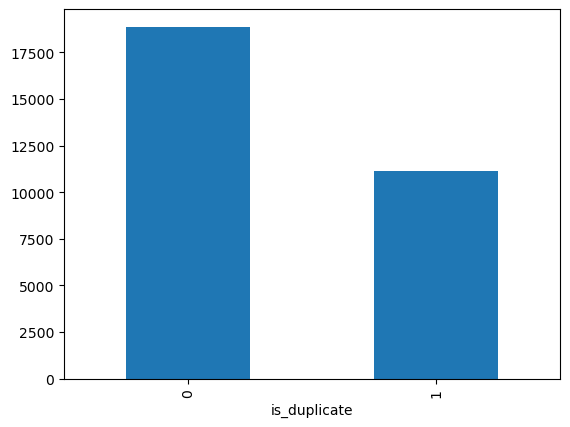

In [19]:
# Distribution of duplicate and non-duplicate questions
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate']. value_counts()/new_df['is_duplicate'].count()) *100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [21]:
#Repeated Questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape [0])

Number of unique questions 59832
Number of questions getting repeated 145


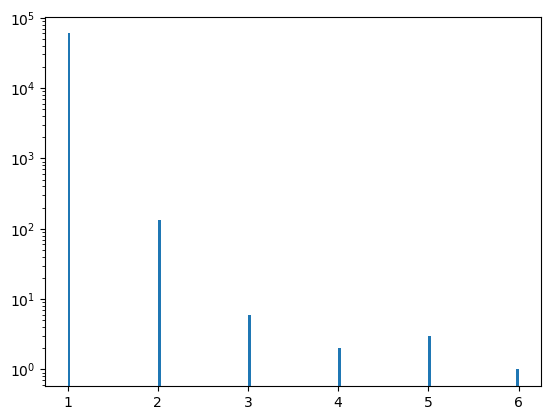

In [23]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [25]:
new_df['ql_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df[ 'question2'].str.len()

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,ql_len,q2_len
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50


In [29]:
new_df ['q1_num_words ']= new_df['question1']. apply(lambda row: len(row.split(" ")))
new_df['q2_num_words '] = new_df['question2' ].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10


In [31]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row[ 'question2'].split(" ")))
    return len(w1 & w2)

In [33]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words,word_common
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4


In [35]:
def total_words (row):
    w1 = set(map(lambda word: word.lower().strip(), row[ 'question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len (w2))

In [37]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,15
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,32
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,19
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,30
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,25


In [39]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
95241,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0,39,54,6,9,1,15,0.07
185512,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1,134,49,24,10,5,32,0.16
178179,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1,60,57,10,9,4,19,0.21
366934,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0,121,62,23,10,2,30,0.07
215887,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0,68,50,15,10,4,25,0.16


minimum characters 3
maximum characters 314
average num of characters 59


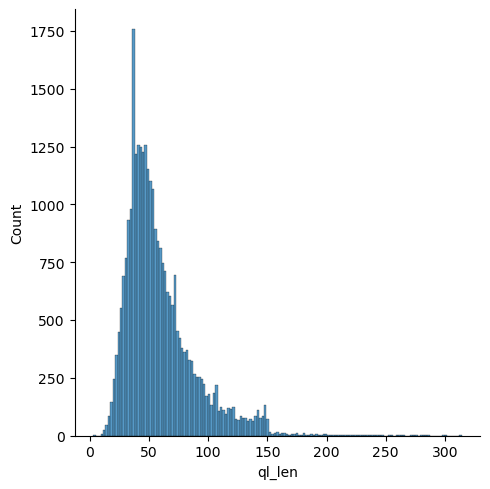

In [41]:
#Analysis

sns.displot(new_df['ql_len'])
print('minimum characters',new_df['ql_len'].min()) 
print('maximum characters', new_df ['ql_len']. max ( ))
print('average num of characters',int(new_df['ql_len'].mean()))

minimum characters 5
maximum characters 1151
average num of characters 59


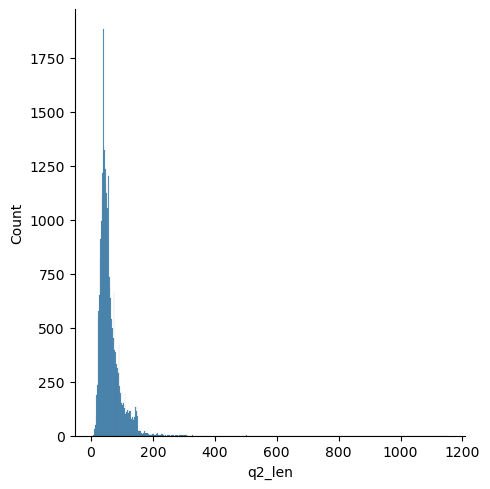

In [43]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min()) 
print('maximum characters', new_df ['q2_len']. max ( ))
print('average num of characters',int(new_df['q2_len'].mean()))

In [45]:
sns.displot(new_df['q1_num_words'])
print('minimum characters',new_df['q1_num_words'].min()) 
print('maximum characters', new_df ['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

KeyError: 'q1_num_words'

In [47]:
sns.displot(new_df['q2_num_words'])
print('minimum characters',new_df['q2_num_words'].min()) 
print('maximum characters', new_df ['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

KeyError: 'q2_num_words'

/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/1027654490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_common'], label='non duplicate')
/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/1027654490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

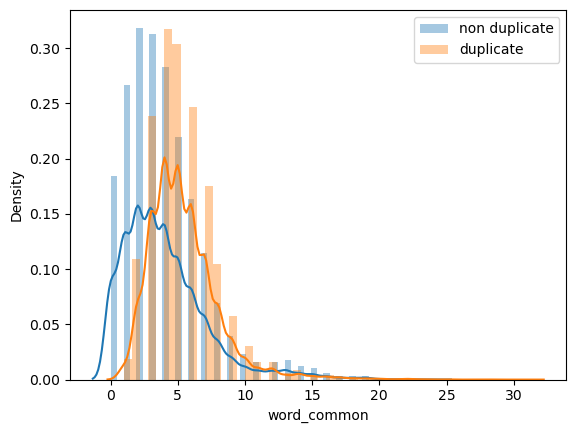

In [49]:
sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_common'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1][ 'word_common'], label='duplicate')
plt.legend()
plt.show()

/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/886857421.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_total'],label='non duplicate')
/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/886857421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

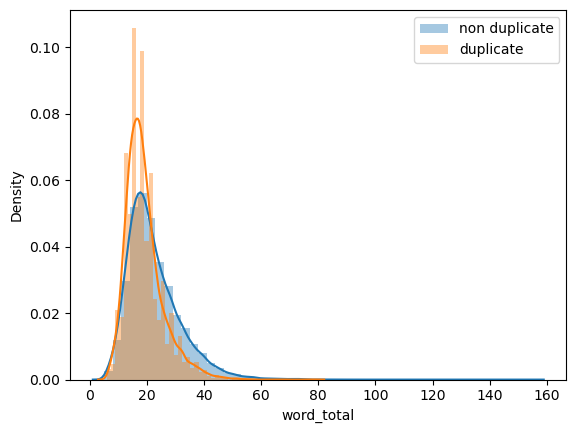

In [51]:
sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1][ 'word_total'], label='duplicate')
plt.legend ()
plt.show()

/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/2588092515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_share'], label='non duplicate')
/var/folders/j3/mx9h5s1n1wlgk_08sqh27g3h0000gn/T/ipykernel_1891/2588092515.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

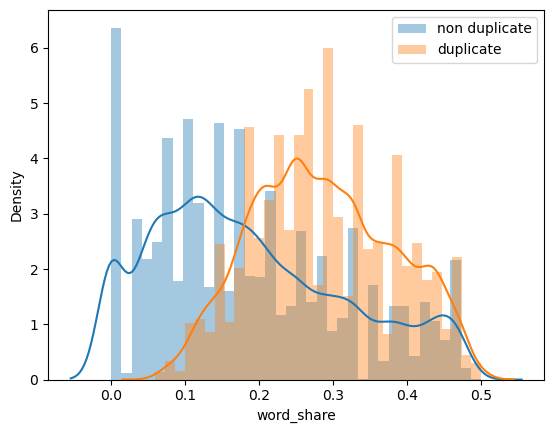

In [53]:
sns.distplot(new_df[new_df['is_duplicate'] == 0][ 'word_share'], label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1][ 'word_share'], label='duplicate')
plt.legend ()
plt.show()

In [55]:
ques_df = new_df[['question1','question2' ]]
ques_df.head()

,question1,question2
95241,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...
185512,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?
178179,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...
366934,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...
215887,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...


In [57]:
final_df = new_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
95241,0,39,54,6,9,1,15,0.07
185512,1,134,49,24,10,5,32,0.16
178179,1,60,57,10,9,4,19,0.21
366934,0,121,62,23,10,2,30,0.07
215887,0,68,50,15,10,4,25,0.16


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [61]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df. index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape 

(30000, 6000)

In [63]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,ql_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95241,0,39,54,6,9,1,15,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
185512,1,134,49,24,10,5,32,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
178179,1,60,57,10,9,4,19,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
366934,0,121,62,23,10,2,30,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
215887,0,68,50,15,10,4,25,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    final_df.iloc[:, 1:].values,  # Features (all columns except the first)
    final_df.iloc[:, 0].values,   # Labels (first column)
    test_size=0.2,
    random_state=42
)


In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7688333333333334